<a href="https://colab.research.google.com/github/amirmohammadkalateh/Convolution_process/blob/main/conlolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

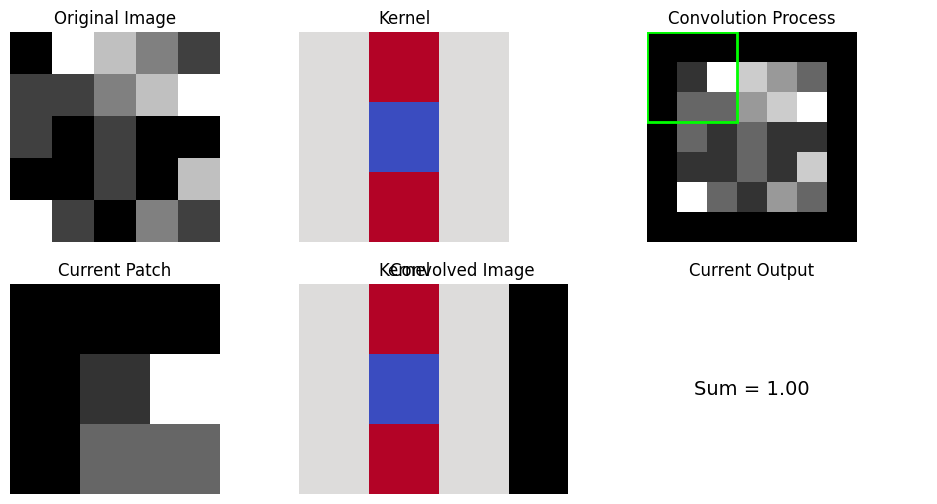

<Figure size 640x480 with 0 Axes>


Convolved Image (using scipy.signal.convolve2d with 'same' padding):
[[ 1 -3 -1  1  3]
 [ 1  4  3  0 -2]
 [ 1  2  3  4  8]
 [ 6  2  1  3 -1]
 [-4 -1  1 -2  2]]

Convolved Image (using scipy.signal.convolve2d with 'valid' padding):
[[4 3 0]
 [2 3 4]
 [2 1 3]]

Convolved Image (using scipy.signal.convolve2d with padding=1, mode='valid'):
[[ 1 -3 -1  1  3]
 [ 1  4  3  0 -2]
 [ 1  2  3  4  8]
 [ 6  2  1  3 -1]
 [-4 -1  1 -2  2]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import matplotlib.gridspec as gridspec

def visualize_convolution(image, kernel, padding=0, stride=1):
    """
    Performs 2D convolution and visualizes the process.

    Args:
        image (np.ndarray): The input image (2D array).
        kernel (np.ndarray): The convolution kernel (2D array).
        padding (int): The amount of zero-padding to apply.
        stride (int): The stride of the convolution.
    """
    image_padded = np.pad(image, padding, mode='constant')
    kernel_height, kernel_width = kernel.shape
    image_height_padded, image_width_padded = image_padded.shape
    output_height = (image_height_padded - kernel_height) // stride + 1
    output_width = (image_width_padded - kernel_width) // stride + 1
    convolved_image = np.zeros((output_height, output_width))

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1.5])

    # Display Original Image
    ax0 = plt.subplot(gs[0, 0])
    ax0.imshow(image, cmap='gray')
    ax0.set_title('Original Image')
    ax0.axis('off')

    # Display Kernel
    ax1 = plt.subplot(gs[0, 1])
    ax1.imshow(kernel, cmap='coolwarm')
    ax1.set_title('Kernel')
    ax1.axis('off')

    # Convolution Process Visualization
    ax2 = plt.subplot(gs[0, 2])
    ax2.imshow(image_padded, cmap='gray')
    ax2.set_title('Convolution Process')
    ax2.axis('off')

    ax3 = plt.subplot(gs[1, :])
    ax3.imshow(convolved_image, cmap='gray')
    ax3.set_title('Convolved Image')
    ax3.axis('off')

    kernel_center_y, kernel_center_x = kernel_height // 2, kernel_width // 2

    for y in range(0, image_height_padded - kernel_height + 1, stride):
        for x in range(0, image_width_padded - kernel_width + 1, stride):
            patch = image_padded[y:y + kernel_height, x:x + kernel_width]
            result = np.sum(patch * kernel)
            convolved_image[y // stride, x // stride] = result

            # Update the convolution process visualization
            ax2.clear()
            ax2.imshow(image_padded, cmap='gray')
            ax2.set_title('Convolution Process')
            ax2.axis('off')

            # Highlight the current patch
            rect = plt.Rectangle((x - 0.5, y - 0.5), kernel_width, kernel_height, linewidth=2, edgecolor='lime', facecolor='none')
            ax2.add_patch(rect)

            # Display the current patch and kernel for element-wise multiplication
            ax_patch = fig.add_subplot(gs[1, 0])
            ax_patch.imshow(patch, cmap='gray')
            ax_patch.set_title('Current Patch')
            ax_patch.axis('off')

            ax_kernel_mult = fig.add_subplot(gs[1, 1])
            ax_kernel_mult.imshow(kernel, cmap='coolwarm')
            ax_kernel_mult.set_title('Kernel')
            ax_kernel_mult.axis('off')

            ax_result = fig.add_subplot(gs[1, 2])
            ax_result.text(0.5, 0.5, f'Sum = {result:.2f}', fontsize=14, ha='center', va='center')
            ax_result.set_title('Current Output')
            ax_result.axis('off')

            plt.pause(0.5)  # Pause to visualize each step
            fig.delaxes(ax_patch)
            fig.delaxes(ax_kernel_mult)
            fig.delaxes(ax_result)

    # Final Convolved Image
    ax3.imshow(convolved_image, cmap='gray')
    ax3.set_title('Convolved Image')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example Image
    image = np.array([[1, 5, 4, 3, 2],
                      [2, 2, 3, 4, 5],
                      [2, 1, 2, 1, 1],
                      [1, 1, 2, 1, 4],
                      [5, 2, 1, 3, 2]])

    # Example Filter (Vertical Edge Detector)
    kernel = np.array([[ 0,  1,  0],
                       [ 0, -1,  0],
                       [ 0,  1,  0]])

    # Example with padding and stride
    padding_amount = 1
    stride_amount = 2  # Let's use a stride of 2 for demonstration

    visualize_convolution(image, kernel, padding_amount, stride_amount)

    # You can also use scipy's convolve2d for verification
    convolved_image_scipy_same = convolve2d(image, kernel, mode='same') # 'same' padding here
    print("\nConvolved Image (using scipy.signal.convolve2d with 'same' padding):")
    print(convolved_image_scipy_same)

    convolved_image_scipy_valid = convolve2d(image, kernel, mode='valid') # No padding
    print("\nConvolved Image (using scipy.signal.convolve2d with 'valid' padding):")
    print(convolved_image_scipy_valid)

    # To simulate stride > 1 with convolve2d and padding, we'd typically convolve
    # with a stride of 1 on the padded image and then potentially downsample
    # the output if needed for direct comparison in all scenarios.
    # For simplicity in this example, let's just show the 'valid' and 'same' modes.
    image_padded_for_valid = np.pad(image, padding_amount, mode='constant')
    convolved_image_padded_scipy_valid = convolve2d(image_padded_for_valid, kernel, mode='valid')
    print(f"\nConvolved Image (using scipy.signal.convolve2d with padding={padding_amount}, mode='valid'):")
    print(convolved_image_padded_scipy_valid)